In [10]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib as mpl
from datetime import timezone

register_matplotlib_converters()

# File locations
#----------------
data_home = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/jun_to_sept_2021/'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/pngs/gap_filling/'

In [11]:
# Load the df 
#-------------
oxaria1_pm = pd.read_feather(data_home+'oxaria1_pm_gf_oct.ftr').set_index(['tag','rec'])
oxaria1_pm_lt = oxaria1_pm.iloc[:,[0,1,2,3,28,29,30,31,32,33,34,36,37,38,40]]
del oxaria1_pm

# Checking out the data types 
#-----------------------------
oxaria1_pm_lt.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6801187 entries, ('scs-bgx-536', Timestamp('2021-06-01 00:00:02+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-09-30 23:59:53+0000', tz='UTC'))
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   val.mtf1        float32
 1   val.pm1         float32
 2   val.mtf5        float32
 3   val.pm2p5       float32
 4   val.mtf3        float32
 5   val.pm10        float32
 6   val.mtf7        float32
 7   val.per         float32
 8   val.sfr         float32
 9   val.sht.hmd     float32
 10  val.sht.tmp     float32
 11  exg.rn20.pm10   float32
 12  exg.rn20.pm1    float32
 13  exg.rn20.pm2p5  float32
 14  name            object 
dtypes: float32(14), object(1)
memory usage: 618.5+ MB


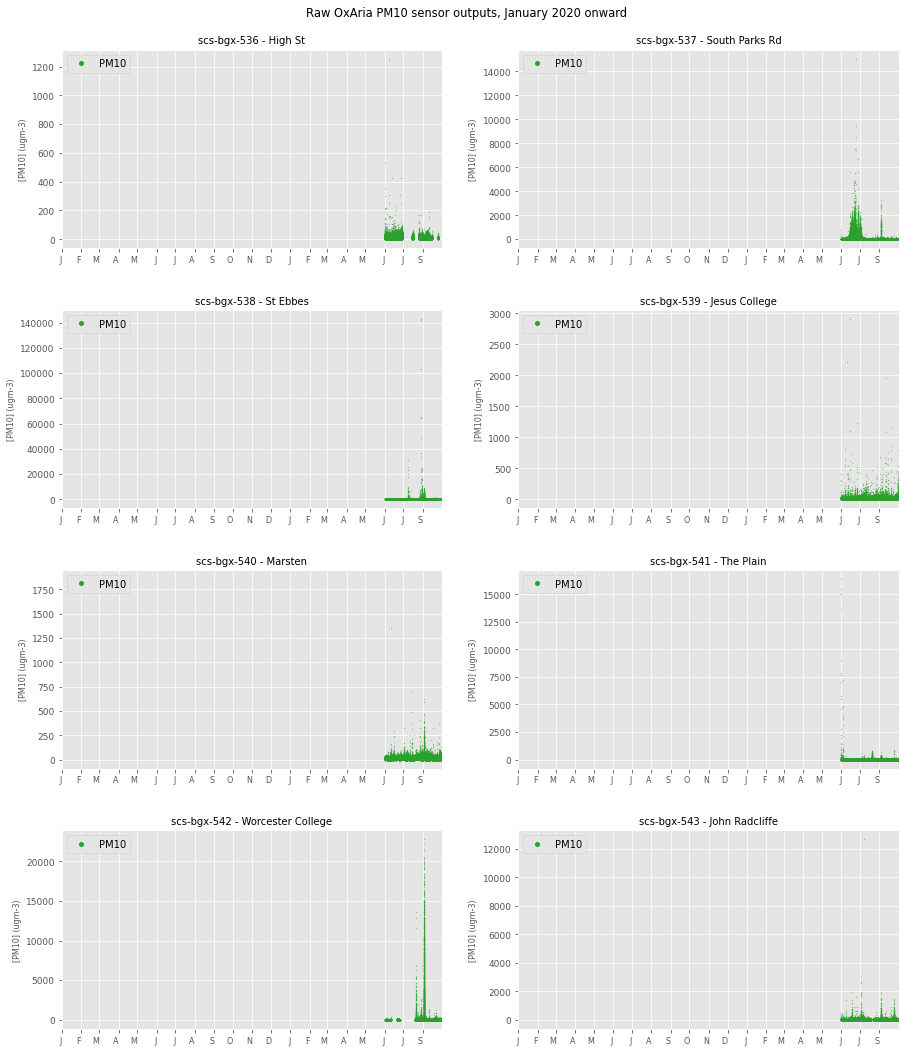

In [12]:
# PM2.5 plots
# -----------
plt.style.use('ggplot')
x_ticks = pd.date_range('2020-01-01', periods=20, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'S'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,9,1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria PM10 sensor outputs, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria1_pm_lt.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.pm10', c='tab:green', linewidth=0.5, marker='o', ms=0.2, ls='',
             label='PM10', ax=ax, legend=True, zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM10] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    plt.subplots_adjust(wspace=0.2, hspace=0.31)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

#plt.savefig(pngs+'oxaria0_pm25_15m_raw_sensor_ts_536_q12021.png')
plt.show()

for ax in axes_list:
    ax.remove()

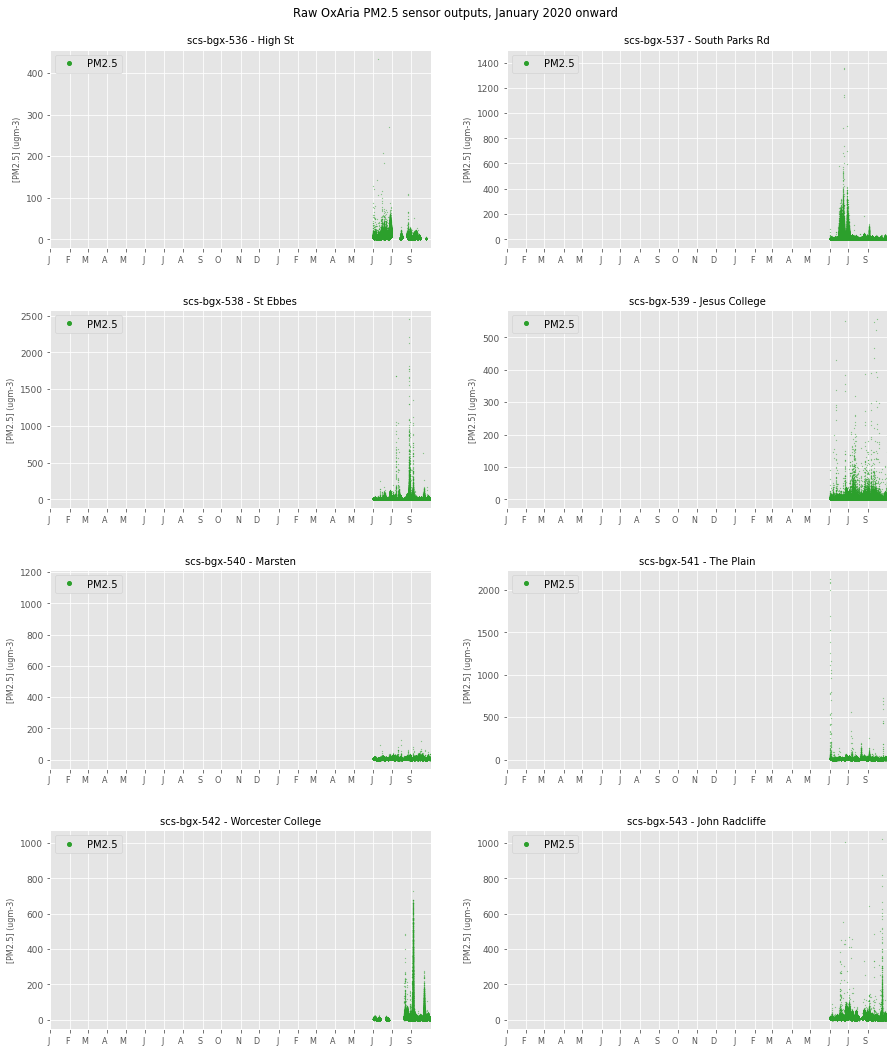

In [13]:
# PM2.5 plots
# -----------
plt.style.use('ggplot')
x_ticks = pd.date_range('2020-01-01', periods=20, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'S'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,9,1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria PM2.5 sensor outputs, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria1_pm_lt.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.pm2p5', c='tab:green', linewidth=0.5, marker='o', ms=0.2, ls='',
             label='PM2.5', ax=ax, legend=True, zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM2.5] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    plt.subplots_adjust(wspace=0.2, hspace=0.31)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

#plt.savefig(pngs+'oxaria0_pm25_15m_raw_sensor_ts_536_q12021.png')
plt.show()

for ax in axes_list:
    ax.remove()

In [14]:
# Some cleaning incase have missed anything
#-------------------------------------------
oxaria1_pm_lt = oxaria1_pm_lt[~oxaria1_pm_lt.index.duplicated(keep='last')].reset_index()
oxaria1_pm_lt = oxaria1_pm_lt.dropna(axis=0,subset=['tag','rec']).set_index(['tag','rec']).sort_index()

In [15]:
# There don't seem to be any outages that need removing so just saving

In [16]:
# Apply empirical filters
#-------------------------
cols = ['val.pm10','val.pm2p5','val.pm1']

condition =  ((oxaria1_pm_lt['val.sfr'] < 2.0) | \
             (oxaria1_pm_lt['val.sht.tmp'] < -10.0) | \
             (oxaria1_pm_lt['val.sht.tmp'] > 35.0) | \
             (oxaria1_pm_lt['val.sht.hmd'] < 35.0))

for col in cols:
    oxaria1_pm_lt[col+'_1'] = np.where(condition, np.nan, oxaria1_pm_lt[col])

# Save to feather
#-----------------
oxaria1_pm_lt.reset_index().to_feather(data_home+'oxaria1_pm_stable_oct21.ftr')

In [17]:
oxaria1_pm_lt.info(show_counts=True) #.set_index(['tag','rec']).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6801187 entries, ('scs-bgx-536', Timestamp('2021-06-01 00:00:02+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-09-30 23:59:53+0000', tz='UTC'))
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   val.mtf1        6801187 non-null  float32
 1   val.pm1         6801187 non-null  float32
 2   val.mtf5        6801187 non-null  float32
 3   val.pm2p5       6801187 non-null  float32
 4   val.mtf3        6801187 non-null  float32
 5   val.pm10        6801187 non-null  float32
 6   val.mtf7        6801187 non-null  float32
 7   val.per         6801187 non-null  float32
 8   val.sfr         6801187 non-null  float32
 9   val.sht.hmd     6801187 non-null  float32
 10  val.sht.tmp     6801187 non-null  float32
 11  exg.rn20.pm10   6801187 non-null  float32
 12  exg.rn20.pm1    6801187 non-null  float32
 13  exg.rn20.pm2p5  6801187 non-null  float32
 14  name      